# Analysis of Bank Precise Telemarketing

***Li, Youran (3171-4486-85): youranli@usc.edu***

***Pan, Dinglu (6564-8915-51): dinglupa@usc.edu***

***Wan, Junbin (5371-1032-27): junbinwa@usc.edu***

## I. Introduction

With the advent of the data age and the wide application of data mining technology, banking financial products are no longer a single, extensive net sales, but rely on the intelligent analysis of big data and the accurate judgment of algorithms to carry out diversified products. Telemarketing, as a traditional marketing method in the banking industry, is effective in acquiring customers. Due to the randomness and low hit rate, the traditional bank telemarketing method is difficult to meet the needs of modern development. How to make good use of various data in the bank database to conduct scientific and effective telemarketing is the key to realizing bank digitization and network intelligence.

Telemarketing has a long history. It first appeared in the United States in the 1970s and was proposed by Juic Freestone. Brown (1992) proposed a telemarketing performance appraisal system based on management. M.C.Rita (1996) studied the regulation of telemarketing and summarized its development process. In 2006, Mann made a detailed summary of the telemarketing process. Cartez and Laureano (2012) improved the effect of telemarketing by applying the data mining technology of support vector machine to customer data. In 2013, Elsalamony used logistic regression model, naive Bayes algorithm and neural network algorithm to analyze the effect of bank telemarketing. Maro et al (2014) used algorithms such as decision tree, support vector machine, neural network, and evaluation indicators such as AUC and LIFT to find the optimal model that maximizes the effectiveness of telemarketing. In 2015, Kim et al used deep convolutional neural networks to predict the success rate of customers purchasing products, and compared with traditional statistical machine learning algorithms such as decision trees and logistic regression. In 2017, Liu improved the support vector machine algorithm, proposed a fuzzy support vector machine algorithm, and used the improved support vector machine algorithm to predict the purchase probability of telemarketing. Jiang (2018) used classification algorithms such as Bayesian, support vector machine and logistic regression to predict the best consumer groups for bank telemarketing, and found that the prediction accuracy and ROC curve of the logistic regression model were better than other models, and the experimental results can be used for banks. Management provides some advice and guidance. In 2020, Yan et al optimized the Kohonen network for unsupervised learning and proposed the S_Kohonen network for supervised learning to predict bank telemarketing.

In this project, our group will mainly use the data mining method to analyze and establish a model for bank telemarketing, so as to provide an effective marketing method. First, we target the potential customer groups through data analysis, and then potential customer groups and high-quality customer groups are screened out through data mining. Combined with the characteristics of customer groups, we can achieve precise banking telemarketing. This approach not only improves customer satisfaction, but also increases revenue for the bank. While maintaining the advantages of telemarketing itself, data mining technology can also be used to increase customers' favorable impression of the company through "high hit rate" precision marketing, obtain more profits for the bank, and save the company's human and financial resources.

## II. Data Description

### 1. Data Source

We collected the data called bank.csv in Kaggle https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset/code. After importing the bank dataset, we find that there are 11162 rows of observations, 16 columns of features, and 1 column of labels. The features of this dataset are: age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, and poutcome. The label is deposit, which indicates whether the customer choose to subscribe the banking services.

In [61]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
#importing bank.csv data
data = pd.read_csv(r'bank.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [63]:
data.shape

(11162, 17)

##### Data description is as following.

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### 2. Data Cleaning

Using the histograms to view missing data. From the figure below, we found that the features and labels are both 11162 lines, and there is no missing situation.

Text(0.5, 1.0, 'Check for missing data')

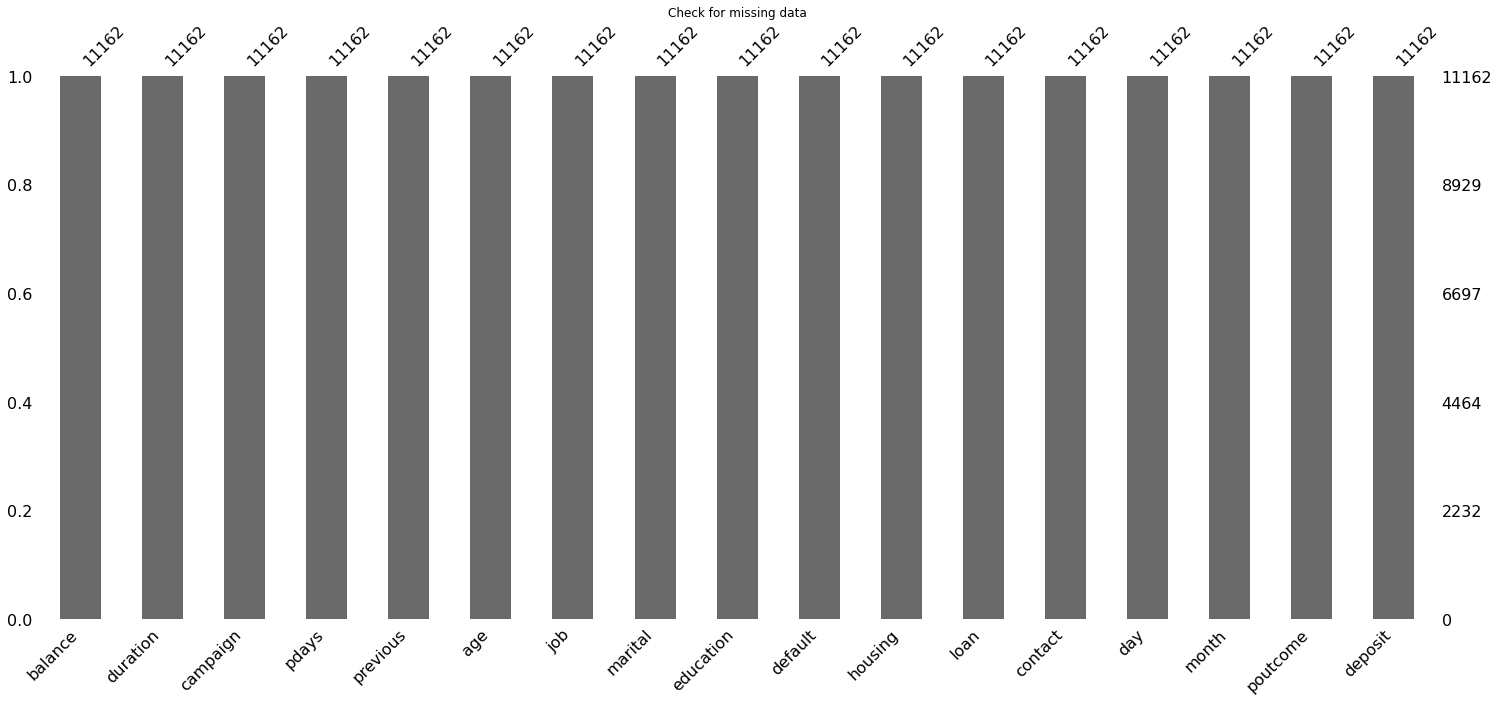

In [109]:
import missingno as msno
p = msno.bar(data)
plt.title('Check for missing data')

Checking the outliers of the features "balance" and "campaign", the first picture below is the boxplot of "campaign", the second picture below is the boxplot of "balance", the black dots in the figure are the outliers, First, the outliers are filled with null values, and then processed according to the method of filling missing values. In this experiment, the mean value is used to fill in.

<AxesSubplot:xlabel='campaign'>

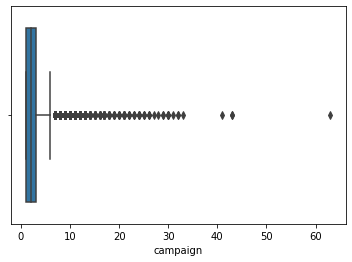

In [66]:
sns.boxplot(data['campaign'])

<AxesSubplot:xlabel='balance'>

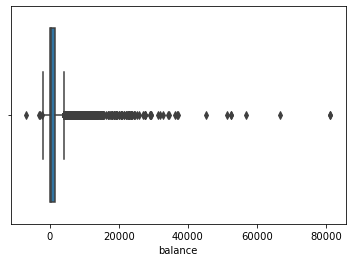

In [67]:
sns.boxplot(data['balance'])

In [68]:
def outliners(train_after_corr,col,scale=1.5):
      def box_plot_outliners(data_ser,box_scale):
          IQR=box_scale*(data_ser.quantile(0.75)-data_ser.quantile(0.25))
          val_low=data_ser.quantile(0.25)-IQR
          val_up=data_ser.quantile(0.75)+IQR
          rule_low=(data_ser<val_low)
          rule_up=(data_ser>val_up)
          return rule_low,rule_up,val_low,val_up
      data_n=train_after_corr.copy()
      data_series=data_n[col]
      rule_low,rule_up,val_low,val_up=box_plot_outliners(data_series,box_scale=scale)
      data_n[col].loc[rule_up]=np.nan
      data_n[col].loc[rule_low]=np.nan
      return data_n

In [69]:
data = outliners(data,'campaign',scale=1.5)
data = outliners(data,'balance',scale=1.5)

In [70]:
data['campaign'].fillna(data['campaign'].mean(), inplace=True) 
data['balance'].fillna(data['balance'].mean(), inplace=True) 

After that, we carry out the data stationarity test, the test method used here is the unit root test, and the value of P-Value is way less than 1%. So there is no significant instability. Therefore, we can consider the data series to be stationary.

In [71]:
import test_stationarity
test_stationarity.testStationarity(data['pdays'])

Test Statistic                -6.599881e+00
p-value                        6.777756e-09
#Lags Used                     4.000000e+01
Number of Observations Used    1.112100e+04
Critical Value (1%)           -3.430938e+00
Critical Value (5%)           -2.861800e+00
Critical Value (10%)          -2.566908e+00
dtype: float64

### 3. Feature Description

The bank dataset has 16 features, 7 of which are numerical, namely: age, balance, day, duration, campaign, pdays and previous. Analyzing the numerical characteristics of customers who order time deposit business (i.e. successful customers), it can be seen from the description of the dataset: 

1) The age characteristics of customers are mainly distributed between 32 and 49 years old. It is speculated that people in this age group need More income to get married, buy a house, pay for children’s education, etc.<p>
2) The average value of customer balance characteristics is 1,528 euros, and the highest is 81,204 euros. It is speculated that the more the balance, the more interested in the product.<p>
3) The $\frac{3}{4}$ quantile of "day" characteristics are 22, and the average is 15, indicating that there are more exchanges at the end of each month.<p>
4) The overall call time of the customer duration feature is relatively long, with a median of around 255, indicating that the customer may be interested in the product.<p>
5) The minimum value of the customer campaign feature is 1, and the maximum value is 63, indicating the willingness to order bank products The stronger the customer, the more communication times in this activity, and the customer who ordered the product had at least one communication in this activity.<p> 
6) The mean of customer pdays characteristic is 51.33, $\frac{3}{4}$ quantile is 20, indicating that only a small number of customers have been contacted since the last event, and most customers have not been contacted. This shows that old customers will take the initiative to order products even if they do not contact often.<p>
7) The mean of the customer's previous characteristic is 0.83, the $\frac{1}{4}$ quantile and $\frac{1}{2}$ quantile are 0, and the $\frac{3}{4}$ quantile is 1.00 . It is explained that customers who will purchase products will have fewer exchanges before this event. It is speculated that the reason may be that customers are not interested in purchasing bank products at that time.

In [72]:
num_col=['age','balance','day','duration','campaign','pdays','previous']
data[num_col].describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,809.882557,15.658036,371.993818,2.024524,51.330407,0.832557
std,11.913369,949.462038,8.420740,347.128386,1.228293,108.758282,2.292007
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,123.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,551.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1099.000000,22.000000,496.000000,2.024524,20.750000,1.000000
max,95.000000,4087.000000,31.000000,3881.000000,6.000000,854.000000,58.000000


The correlation coefficient graph is a statistical graph that describes the strength of the correlation between two variables. If the correlation coefficient graph is decorated with color in addition to the coefficient value, then this graph is called a correlation coefficient heat map. Figure 6 shows the correlation coefficient heat map of the numerical variables of customers who order time deposit business (i.e., successful customers). The darker the color, the higher the correlation. As can be seen from the figure below, the correlation between pdays and previous is high, and the campaign and pdays have a strong negative correlation.


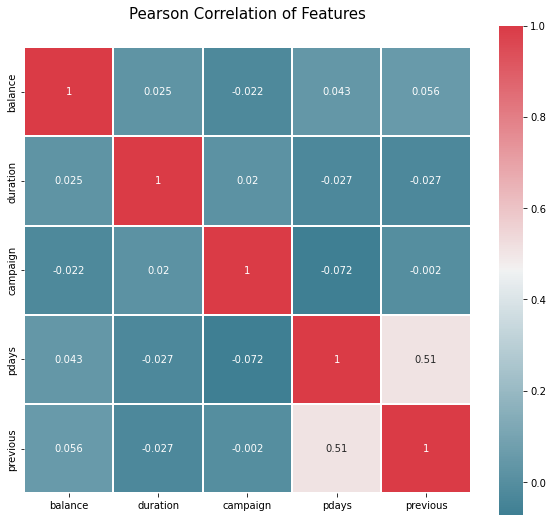

In [108]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(10, 10))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':10 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
correlation_heatmap(data[num_col])

Under the duration feature, the boxplot of the duration of calls between customers who ordered products and customers who did not order products is shown below. The first graph is a box plot of the call duration of customers who ordered the product. The overall call time is longer, with a median of around 450. On the other hand, in the second graph, customers who did not order products had much shorter call durations. The median is about 250, and the overall duration is about half of the call duration of customers who purchased the product. It is speculated that the reason for the longer call time is that the customer is very interested in the product and does not hang up in advance. At the same time, the sales representative has sufficient time to introduce the product and is easy to promote.

In [74]:
#Split the duration feature of customers who ordered and did not order products
a = data['duration'][data['deposit']=='yes']
b = data['duration'][data['deposit']=='no']

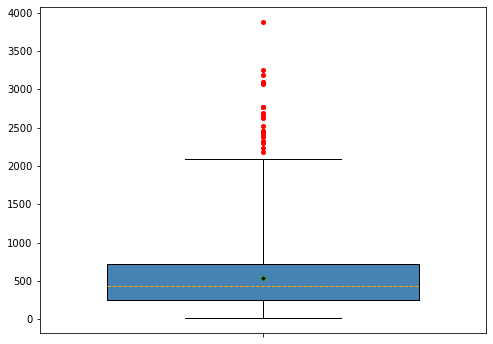

In [75]:
#Under the duration feature, a boxplot of the duration call duration of the customer who ordered the product
f,ax = plt.subplots(figsize = (8, 6))
plt.boxplot(x = a,          
            whis = 3,      
            widths = 0.7,      
            patch_artist = True,      
            showmeans = True,      
            boxprops = {'facecolor':'steelblue'},
            flierprops = {'markerfacecolor':'red', 'markeredgecolor':'red', 'markersize':4},          
            meanprops = {'marker':'D','markerfacecolor':'black', 'markersize':4},          
            medianprops = {'linestyle':'--','color':'orange'}, 
            labels = [''] 
           )
plt.show()

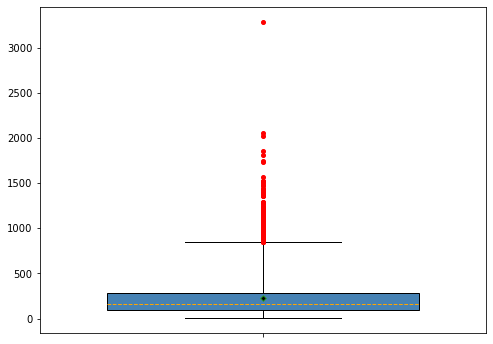

In [76]:
f,ax = plt.subplots(figsize = (8, 6))
plt.boxplot(x = b,       
            whis = 3, 
            widths = 0.7,       
            patch_artist = True,    
            showmeans = True,     
            boxprops = {'facecolor':'steelblue'},
            flierprops = {'markerfacecolor':'red', 'markeredgecolor':'red', 'markersize':4},          
            meanprops = {'marker':'D','markerfacecolor':'black', 'markersize':4},          
            medianprops = {'linestyle':'--','color':'orange'}, 
            labels = ['']
           )
plt.show()

In [77]:
#Divide "age" into 4 ranges
data['age'][data['age']<=38] = 0
data['age'][(38<data['age'])&(data['age']<=58)] = 1
data['age'][(58<data['age'])&(data['age']<=78)] = 2
data['age'][(78<data['age'])&(data['age']<=95)] = 3

### 4. Process Categorical Variables

The four pie charts below are the proportions of the four features of age, job, education and marital. The age is divided into four intervals, which are under 38, 38 to 58, 58 to 78, and older than 78. 

1) From the "age" feature of the first pie chart, it can be seen that the bank focuses on the marketing of products purchased by customers under the age of 38, followed by 38-58 years old.

2) In the "job" characteristics, it can be seen from the second figure that they are engaged in blue. The marketing of products purchased by collar and management jobs accounts for the largest proportion

3) Among the education features, it can be seen from the third figure that the marketing of purchased products with secondary and tertiary education accounts for a larger proportion

4) Among the marital features, From the fourth figure, we can see that the proportion of marketing and purchasing products for married families is the largest, as high as 56.9%.

In [78]:
import plotly.express as px
for col in ['age',
 'job',
 'education',
 'marital',]:
    tmp=data[col].value_counts().rename_axis(col).reset_index(name='counts')
    fig = px.pie(tmp, values='counts', names=col,title=f'ratio of counts  {col}')
    fig.show()

Marketing category characteristics in telemarketing include methods of contacting customers, contact days, and campaign results. 

1) Among the characteristics of customer housing, it is found that those with mortgage loans are more willing to purchase products than those without mortgage loans

2) Among the characteristics of customer loan, those with personal loans rarely purchase bank products.

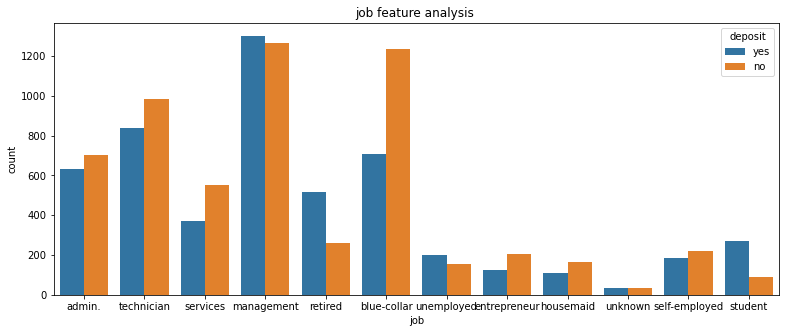

In [79]:
#job feature analysis 
import seaborn as sns
from matplotlib.colors import ListedColormap
plt.figure(figsize=(13, 5))
plt.title('job feature analysis ')
plt.rcParams['font.sans-serif']=['SimHei']
sns.countplot(x='job', hue='deposit', data=data)
plt.show()

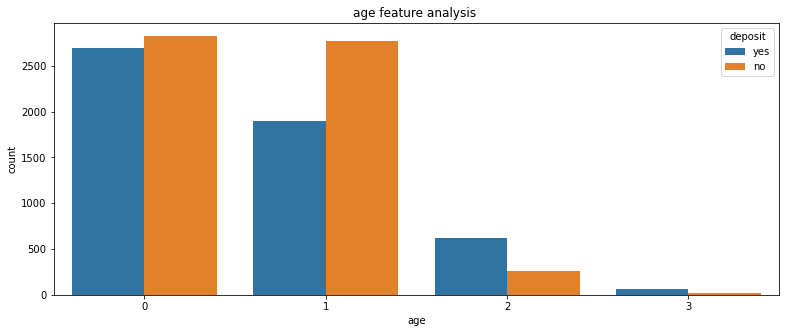

In [80]:
#age feature analysis 
import seaborn as sns
plt.figure(figsize=(13, 5))
plt.title('age feature analysis ')
plt.rcParams['font.sans-serif']=['SimHei'] 
sns.countplot(x='age', hue='deposit', data=data)
plt.show()

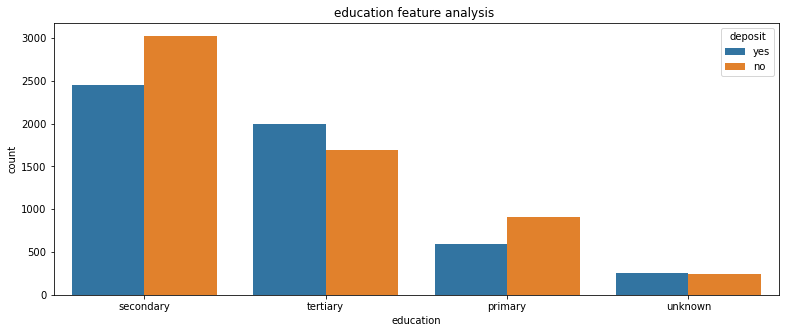

In [81]:
#education feature analysis 
import seaborn as sns
plt.figure(figsize=(13, 5))
plt.title('education feature analysis ')
plt.rcParams['font.sans-serif']=['SimHei']
sns.countplot(x='education', hue='deposit', data=data)
plt.show()

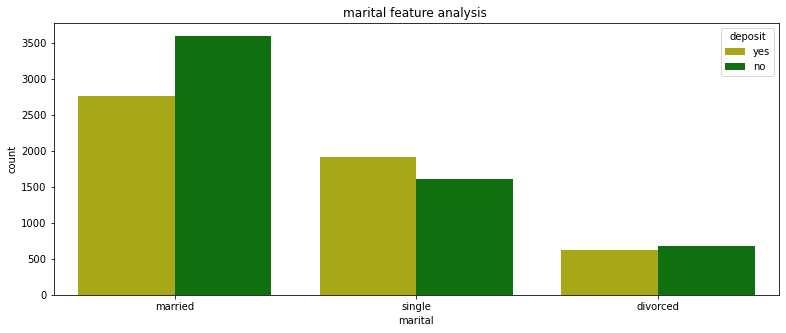

In [82]:
#marital feature analysis 
import seaborn as sns
plt.figure(figsize=(13, 5))
plt.title('marital feature analysis ')
sns.countplot(x='marital', hue='deposit', data=data,palette=["y", "g"])
plt.show()

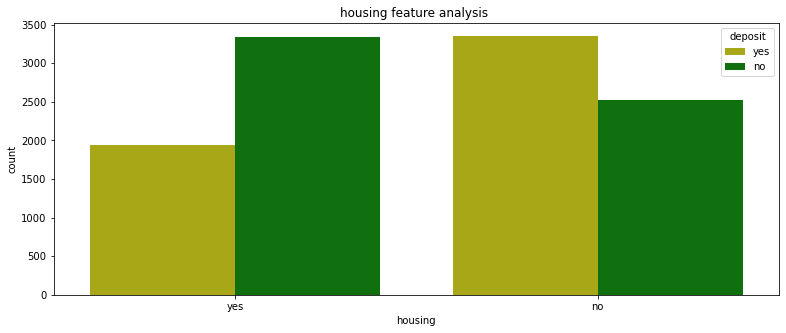

In [83]:
#housing feature analysis 
import seaborn as sns
plt.figure(figsize=(13, 5))
colors = sns.color_palette('hls')
plt.title('housing feature analysis ')
plt.rcParams['font.sans-serif']=['SimHei']
sns.countplot(x='housing', hue='deposit', data=data,palette=["y", "g"])
plt.show()

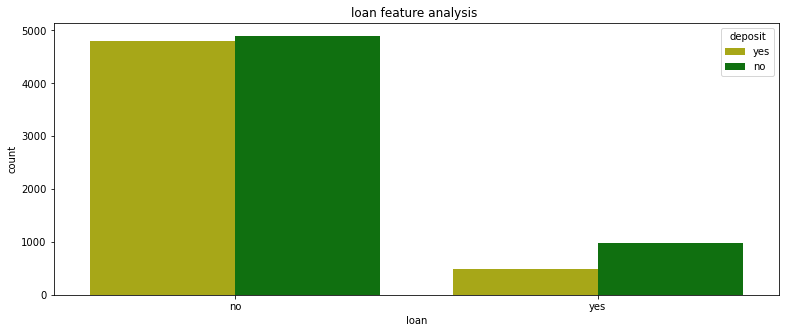

In [84]:
#loan feature analysis 
import seaborn as sns
plt.figure(figsize=(13, 5))
plt.title('loan feature analysis ')
plt.rcParams['font.sans-serif']=['SimHei']
sns.countplot(x='loan', hue='deposit', data=data,palette=["y", "g"])
plt.show()

### 5. Summary of The Data

Through a series of data feature engineering processes, we can find that customers who will order deposit business (i.e. successful customers) have the following characteristics: 

1) Young and middle-aged people aged 38-58

2) Education level is high school or above

3) Engaged in stable work such as technology and management

4) Married persons

5) No default or loan.

## III. Feature Engineering

Data feature engineering is the process of examining, removing or correcting abnormal data. The purpose of feature engineering is to change the form of the data to fit the model and match the needs of the model. After testing, the features of bank telemarketing data are divided into numerical type features and category type features, and there are no missing values, so there is no need for missing value processing. In the following, we will do feature engineering from two aspects: numerical type feature processing, category type feature processing, data dimensionless and imbalance data processing.

### 1. Category type feature processing

The experimental data have a total of 9 categorical features, all of which need to be processed and converted into numerical features. The conversion rules are developed as follows：

1）job：'admin': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired':5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11

2）marital：'divorced': 0, 'married': 1, 'single': 2

3）education：'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3

4）default：'no': 0, 'yes': 1

5）loan：'no': 0, 'yes': 1

6）poutcome：'failure': 0, 'other': 1, 'success': 2, 'unknown': 3

7）deposit：'no': 0, 'yes': 1

8）contact：'cellular': 0, 'telephone': 1, 'unknown': 2

9）housing：'no': 0, 'yes': 1 jan corresponds to 1, feb corresponds to 2, and so on

In [85]:
from sklearn.preprocessing import LabelEncoder 
def LabelConversion(x):
    label = LabelEncoder()
    label.fit(x)
    x = pd.Series(label.transform(x)).rename(x.name)
    x_label = dict(zip(label.classes_, label.transform(label.classes_)))
    return x, x_label

In [86]:
data['job'], label1 = LabelConversion(data['job'])
data['marital'], label2 = LabelConversion(data['marital'])
data['education'], label3 = LabelConversion(data['education'])
data['default'], label4 = LabelConversion(data['default'])
data['loan'], label5 = LabelConversion(data['loan'])
data['poutcome'], label6 = LabelConversion(data['poutcome'])
data['deposit'], label7 = LabelConversion(data['deposit'])
data['contact'], label8 = LabelConversion(data['contact'])
data['housing'], label9 = LabelConversion(data['housing'])
print('job：',label1)
print('marital：',label2)
print('education：',label3)
print('default：',label4)
print('loan：',label5)
print('poutcome：',label6)
print('deposit：',label7)
print('contact：',label8)
print('housing：',label9)

job： {'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}
marital： {'divorced': 0, 'married': 1, 'single': 2}
education： {'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3}
default： {'no': 0, 'yes': 1}
loan： {'no': 0, 'yes': 1}
poutcome： {'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}
deposit： {'no': 0, 'yes': 1}
contact： {'cellular': 0, 'telephone': 1, 'unknown': 2}
housing： {'no': 0, 'yes': 1}


In [87]:
data['month'][data['month']=='jan'] = 1
data['month'][data['month']=='feb'] = 2
data['month'][data['month']=='mar'] = 3
data['month'][data['month']=='apr'] = 4
data['month'][data['month']=='may'] = 5
data['month'][data['month']=='jun'] = 6
data['month'][data['month']=='jul'] = 7
data['month'][data['month']=='aug'] = 8
data['month'][data['month']=='sep'] = 9
data['month'][data['month']=='oct'] = 10
data['month'][data['month']=='nov'] = 11
data['month'][data['month']=='dec'] = 12

In [88]:
data['month'] = data['month'].astype('int')

In [89]:
data['pdays'][data['pdays']== -1] = 0

In [90]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,2,0,1,1,0,2343.0,1,0,2,5,5,1042,1.0,0,0,3,1
1,1,0,1,1,0,45.0,0,0,2,5,5,1467,1.0,0,0,3,1
2,1,9,1,1,0,1270.0,1,0,2,5,5,1389,1.0,0,0,3,1
3,1,7,1,1,0,2476.0,1,0,2,5,5,579,1.0,0,0,3,1
4,1,0,1,2,0,184.0,0,0,2,5,5,673,2.0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0,1,2,0,0,1.0,1,0,0,20,4,257,1.0,0,0,3,0
11158,1,7,1,1,0,733.0,0,0,2,16,6,83,4.0,0,0,3,0
11159,0,9,2,1,0,29.0,0,0,0,19,8,156,2.0,0,0,3,0
11160,1,9,1,1,0,0.0,0,1,0,8,5,9,2.0,172,5,0,0


In [91]:
num_col = ['balance','duration','campaign','pdays','previous']
col = ['age','job','marital','education','default','housing','loan','contact','day','month','poutcome','deposit']

### 2. Numerical feature engineering

The main ways of numerical feature preprocessing are feature scaling (normalization), outlier removal, sorting transformation, and logarithmic transformation. Feature scaling is a method of normalizing the range of independent variables or features of the data, and it is often referred to as normalization. Outlier deletion can be understood as the removal of outliers. In the previous data preprocessing section, the method of replacing outliers with mean values is taken, or if the amount of data is large enough, the method of direct deletion, which is outlier deletion, can also be taken. Here normalization is used to do further processing of numerical features.

Dimensionless normalization of data can eliminate the influence of dimensionality on the final results, normalize different features to between [-1, 1], speed up the convergence of gradient descent, and reduce the training time of the model. The normalization method using Z-score is more stable with sufficient samples and is noise-resistant, and performs well for large sample data sets. Therefore, we decide to uses Z-score normalization for dimensionless processing after data preprocessing.

In [92]:
from sklearn import preprocessing
#Normalization of numerical feature data
zscore = preprocessing.StandardScaler()
#Zscore normalization of features
zscore = zscore.fit_transform(data[num_col])
df_zscore = pd.DataFrame(zscore,index=data[num_col].index,columns=data[num_col].columns)
df_zscore

,balance,duration,campaign,pdays,previous
0,1.614795,1.930226,-0.834141,-0.480430,-0.363260
1,-0.805632,3.154612,-0.834141,-0.480430,-0.363260
2,0.484630,2.929901,-0.834141,-0.480430,-0.363260
3,1.754880,0.596366,-0.834141,-0.480430,-0.363260
4,-0.659227,0.867171,-0.019967,-0.480430,-0.363260
...,...,...,...,...,...
11157,-0.851976,-0.331287,-0.834141,-0.480430,-0.363260
11158,-0.080978,-0.832564,1.608382,-0.480430,-0.363260
11159,-0.822484,-0.622258,-0.019967,-0.480430,-0.363260
11160,-0.853029,-1.045752,-0.019967,1.106361,1.818332


0    5873
1    5289
Name: deposit, dtype: int64


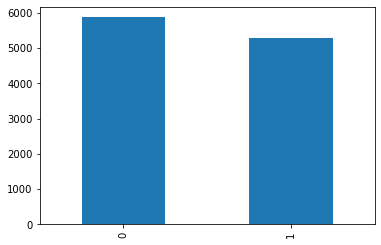

In [93]:
data = pd.concat([df_zscore,data[col]],axis=1)
## Split tags and features
y, x = data['deposit'],data.drop('deposit',axis=1)
# Use the bar chart to draw the number of labels statistics
p = data['deposit'].value_counts().plot(kind="bar")
print(data['deposit'].value_counts())
plt.show()

## IV. Data Modeling

The dataset is divided into training set and test set according to the ratio of 8:2, and the model is used as decision tree and logistic regression.

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, stratify=y)

### 1. Decision Tree Method

The decision tree algorithm is a method for approximating the value of a discrete function. It is a typical classification method that first processes the data, generates readable rules and decision trees using an induction algorithm, and then uses the decisions to analyze the new data. Essentially a decision tree is a process of classifying data through a set of rules. There are three algorithms used for decision trees to measure the degree of feature contribution, namely information gain, information gain rate and Gini index, where CART uses the Gini index minimization criterion, the Gini index is used to select the optimal feature and also to determine the optimal binary cut point for that feature. The Gini index indicates the probability that a randomly selected sample in the sample set is misclassified. The smaller the index, the smaller the probability that the selected sample in the set is misclassified, and the higher the purity of the set, and vice versa. In the classification problem, suppose there is a total of one category, and the probability that the sample point belongs to the first category is, then the Gini index of this probability distribution is: 

$$ Gini(p)=sum_{i=1}^{M}(p_m)(1 - p_m) = 1- sum{i=1}^{M}(p^2)$$ 

For the binary classification problem, if the probability of a sample belonging to one of the classes is：

$$ Gini(p) = 2p(1-p)$$

In traversing the feature set to find the cut point of each feature, assuming that the data set is divided into and two subsets by attributes, the Gini index of the data set under the condition of attributes is calculated as follows:

$$Gini(D,S) = \cfrac{D_1}{D}(Gini(D_1)) +  \cfrac{D_2}{D}(Gini(D_2))$$

### 2. Logistic Regression Model

Logistic regression is a generalized linear model and therefore has much in common with multiple linear regression analysis. Their model forms are basically the same, both have $w'x+b$, where $w$ and $b$ are the parameters to be sought, the difference is that their dependent variables are different, multiple linear regression directly takes $w'x+b$ as the dependent variable, i.e. $y = w'x+b$, while logistic regression corresponds $w'x+b$ to a hidden state $p$ through the function $L, p = L(w'x+b)$, and then determines the value of the dependent variable according to the difference between $p$ and $1-p$ The value of the dependent variable is then determined according to the magnitude of $p$ versus $1-p$. If $L$ is a logistic function, it is a logistic regression, and if $L$ is a polynomial function, it is a polynomial regression. Logistic regression can be either dichotomous or multicategorical, but dichotomous is more common and easier to interpret, and multicategorical can be processed using softmax methods. The most commonly used logistic regression in practice is dichotomous logistic regression

### 3. Excavation Effect Evaluation

To further evaluate the performance of these two models, we evaluated two metrics on the test set, including spirit AUC and accuracy rate (ACC).

$$Accuracy = \cfrac{FN+TP+TN+FP}{TP+TN}$$

Where, $TP$ indicates the number of correctly identified positive samples; $TN$ indicates the number of correctly identified negative samples; $FN$ indicates the number of incorrectly identified positive samples; and $FP$ indicates the number of incorrectly identified negative samples.

In [95]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc,confusion_matrix, roc_auc_score
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1175
           1       0.79      0.77      0.78      1058

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233



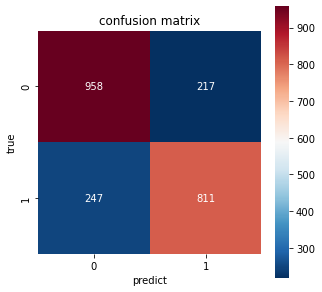

In [96]:
#Decision Tree Model
clf = DecisionTreeClassifier(criterion='entropy',random_state = 0)
clf.fit(x_train, y_train)
pred = clf.predict(x_test) 
C2 = pd.DataFrame(confusion_matrix(y_test, pred, labels=[0, 1])) 
print(classification_report(y_test, pred))
plt.subplots(figsize = (5, 5))
sns.heatmap(C2,square = True,annot=True,fmt = '.20g',cmap="RdBu_r")
plt.title('confusion matrix') 
plt.xlabel('predict') 
plt.ylabel('true') 
plt.show()

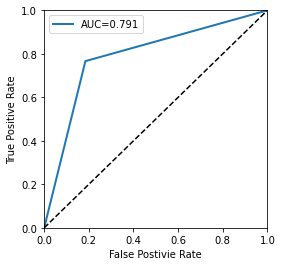

In [97]:
#Calculating the AUC score
auc = roc_auc_score(y_test,pred)
fpr, tpr, thresholds = roc_curve(y_test.ravel(),pred.ravel())  
fig = plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, linewidth = 2,label='AUC=%.3f' % auc)
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1,0,1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1175
           1       0.79      0.77      0.78      1058

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233



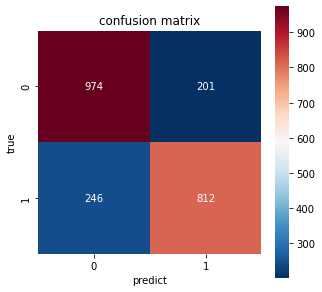

In [98]:
#Logistic Model
model = LogisticRegression()
model.fit(x_train, y_train)
pre = model.predict(x_test) 
print(classification_report(y_test, pred))
plt.subplots(figsize = (5,5))
C2 = pd.DataFrame(confusion_matrix(y_test, pre, labels=[0, 1])) 
sns.heatmap(C2,square = True,annot=True,fmt = '.20g',cmap="RdBu_r")
plt.title('confusion matrix') 
plt.xlabel('predict') 
plt.ylabel('true') 
plt.show()

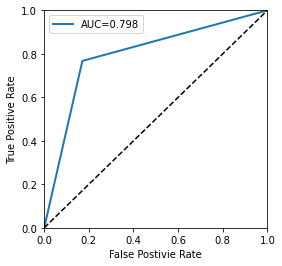

In [99]:
#Calculating the AUC score
auc = roc_auc_score(y_test,pre)
fpr, tpr, thresholds = roc_curve(y_test.ravel(),pre.ravel())  
fig = plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, linewidth = 2,label='AUC=%.3f' % auc)
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1,0,1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

The confusion matrix shows that the classification accuracy of both "0" and "1" categories is close to each other, and the accuracy of "0" category in the decision tree model is 79% and "1" category is 71%. The accuracy of the "0" category for the decision tree model is 79%, and the accuracy of the "1" category is 71%. The logistic regression model has an accuracy rate of 81% for category "0" and 78% for category "1". This indicates that the network structure is suitable for the data of this experiment.

AUC is defined as the area enclosed with the coordinate axis under the ROC curve, and the closer the AUC is to 1.0, the higher the authenticity of the detection method; when it is equal to 0.5, the authenticity is the lowest and has no application value. The AUC of the two models used in this experiment, decision tree and logistic regression, are 0.782 and 0.793, respectively, and the models are more effective.

The accuracy of logistic regression is higher than that of decision tree and the value of AUC is also higher, so it is more appropriate to use logistic regression model to perform accurate marketing to customers.

## V. Findings

### 1. Comparison of The Feature Importance

Feature importance score is a mean of scoring input features based on the degree of influence they have in predicting the explained variable. The importance score highlights which features are most relevant to the explained variable and which features are least relevant to the explained variable.

The top ten important features ('duration', 'day', 'month', 'balance', 'contact', 'pdays', 'job', 'poutcome', 'compaign', 'housing') are retained after the importance score of features, which are also the top ten features that have the greatest impact on marketing effect. As shown in the result below, it can be found that feature 'duration' has the greatest impact on marketing effect, and its importance score is much higher than that of 'day', which ranks second. 'duration' refers to the time of the last call, indicating that the person who wants to buy the product will have an in-depth understanding of the product.

In [100]:
# Using Decession Tree to seclect the first 10 important features
model_dt = DecisionTreeClassifier(criterion='entropy',random_state = 0)
model_dt.fit(x_train, y_train)
X_train_impor = pd.DataFrame(model_dt.feature_importances_, index=x_train.columns, columns=['Revelance'])
X_train_impor_sort = (X_train_impor.sort_values(by='Revelance',ascending=False)[:10])
X_train_impor_sort

,Revelance
duration,0.320299
balance,0.103068
day,0.101928
month,0.101241
contact,0.080856
pdays,0.065944
job,0.048068
campaign,0.031752
poutcome,0.031014
housing,0.030535


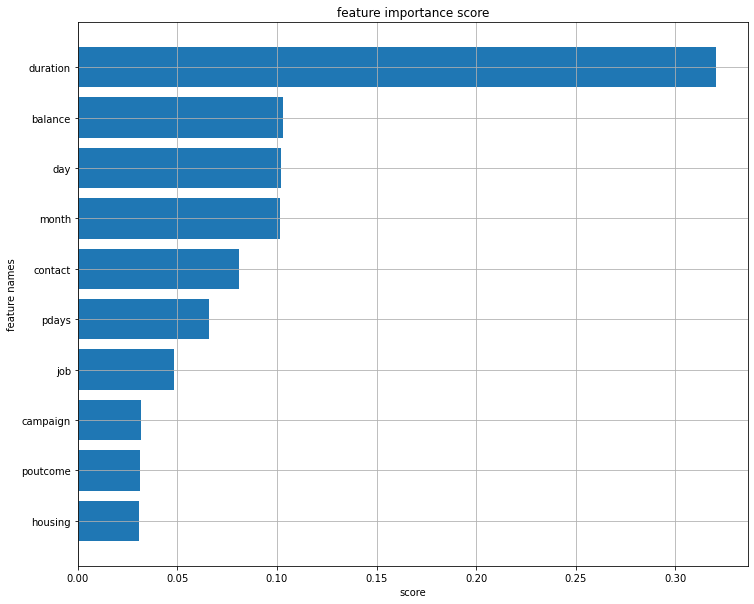

In [101]:
plt.figure(figsize=(12,10))
plt.barh([i for i in X_train_impor_sort.index][::-1], X_train_impor_sort.values.reshape(-1)[::-1])
plt.xlabel('score')
plt.title('feature importance score')
plt.ylabel('feature names')
plt.grid()
plt.show()

In [102]:
X_train = x_train.loc[:,X_train_impor_sort.index]
X_test = x_test.loc[:,X_train_impor_sort.index]

In [103]:
X_train_impor_sort.index

Index(['duration', 'balance', 'day', 'month', 'contact', 'pdays', 'job',
       'campaign', 'poutcome', 'housing'],
      dtype='object')

### 2. Improving the performance of the model

This is achieved by selecting features to be removed (lowest score) or features to be retained (highest score) by means of importance scores, which is a type of feature selection. Feature selection can be used to simplify the problem of modeling, speed up the modeling process, and in some cases, improve the performance of the model. In this experiment, we trained the decision tree model using the 10 retained features and found no significant change in their accuracy, indicating that the deleted features are unimportant features that have little impact on the results and also reduce the training time because of the overall reduction in the amount of data. To verify the conjecture, the data were trained again using Logit regression. Table 3 shows the training results of the three models after feature selection, and it can be found that the accuracy does not fluctuate much either. This method of training the models by removing features with low importance scores is effective for different models.

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1175
           1       0.79      0.76      0.78      1058

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233



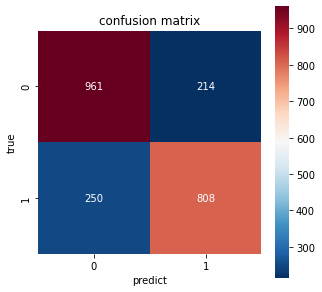

In [104]:
#Decision Tree Model
clf = DecisionTreeClassifier(criterion='entropy',random_state = 0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test) 
C2 = pd.DataFrame(confusion_matrix(y_test, pred, labels=[0, 1])) 
print(classification_report(y_test, pred))
plt.subplots(figsize = (5, 5))
sns.heatmap(C2,square = True,annot=True,fmt = '.20g',cmap="RdBu_r")
plt.title('confusion matrix') 
plt.xlabel('predict') 
plt.ylabel('true') 
plt.show()

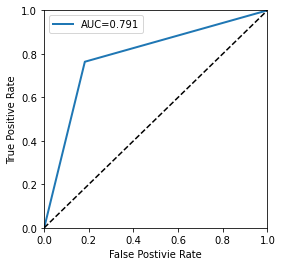

In [105]:
auc = roc_auc_score(y_test,pred)
fpr, tpr, thresholds = roc_curve(y_test.ravel(),pred.ravel()) 
fig = plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, linewidth = 2,label='AUC=%.3f' % auc)
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1,0,1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1175
           1       0.79      0.76      0.78      1058

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233



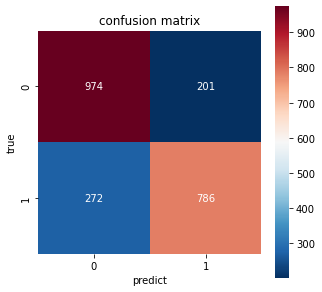

In [106]:
#Logistic Model
model = LogisticRegression()
model.fit(X_train, y_train)
pre = model.predict(X_test) 
print(classification_report(y_test, pred))
plt.subplots(figsize = (5,5))
C2 = pd.DataFrame(confusion_matrix(y_test, pre, labels=[0, 1])) 
sns.heatmap(C2,square = True,annot=True,fmt = '.20g',cmap="RdBu_r")
plt.title('confusion matrix') 
plt.xlabel('predict') 
plt.ylabel('true')
plt.show()

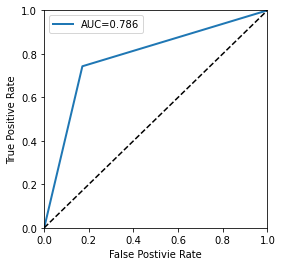

In [107]:
auc = roc_auc_score(y_test,pre)
fpr, tpr, thresholds = roc_curve(y_test.ravel(),pre.ravel()) 
fig = plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, linewidth = 2,label='AUC=%.3f' % auc)
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1,0,1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## VI. Conclusion

With the rapid development of the Internet and the advent of the era of big data, all kinds of industrial data are increasing greatly. How to quickly and accurately analyze data, extract useful information and realize value is the theme of the era of big data. Telemarketing as a means of bank marketing, through learning, this paper from the algorithm level of multi-model comparison to select the best prediction effect of the model.

Telemarketing as a traditional marketing way, although affected by the Impact of the Internet, but still has certain advantages. The telemarketing based on data mining proposed in this paper can help banks to achieve accurate marketing and improve the success rate of marketing. In this way, it can help banks gain more profits, use resources more effectively, reduce sales costs and improve sales efficiency in the future. In addition, it can effectively contact the largest range of target customers in the shortest time, collect external information in time, grasp customer needs more clearly, and establish long-term trust relationship with customers.

Due to the reasons of time, this paper is not perfect, there are shortcomings, mainly reflected in the following aspects. First, the lack of data sets. The lack of data set here is not the index data, but the lack of real customer data set of bank telemarketing. The experimental data in this paper are from the public data set on Kaggle, with few features and a long history. The conclusions obtained may not be applicable to the current bank telemarketing. If banks can provide real customer data sets, data mining can certainly provide useful suggestions for bank telemarketing. Second, the improvement of data processing methods. Due to the low feature dimension of the experimental data set, this paper only processed the existing features. In the future, new features can be added through feature creation, and then important features can be screened out from the new features for data modeling.

## Reference

Brown P B, Casselman B，Conn G, et al. Telemarketing Complex PerformanceManagement System: US[P]. 1992: 1-3.

M.C.Rita. Recent Developments in Telemarketing Regulation. Journal of Public Policy and Marketing[J]. 1996, 15(1): 135-141.

Mann, John Nicholas. Process for Telemarketing: US[P]. 2006: 1-2.

S Moro, P Laureano, P Cater. Enchaning Bank Direct Marketing through Data Mining[C]. European Marketing Academy Conference, 2012: 11-16.

A. Elsalamony H. Bank Direct Marketing Analysis of Data Mining Techniques[J]. International Journal of Computer Applications. 2013, 85(7):12-22.

S Mara, P Cartez, P Rita. A Data-Driven Approch to Predict the Success of Bank Telemartketing[J]. Decision Support System. 2014, 62(1246): 22-31.

Kim K H, Lee C S, Jo S M. Predicting the Success of Bank Telemarketing Using Deep Convolutional Neural Network[C]//International Conference of Soft Computing and Pattern Recognition. 2015: 314-317.

Liu M, Yan Y M, He Y D. A Fuzzy Support Vector Machine Algorithm and Its Application in Telemarketing[M]//Quantitative Logic and Soft Computing 2016. Springer International Publisher. 2017: 190-197.

Yiyan Jiang. Using Logistic Regression Model to Predict the Success of Bank Telemarketing[C]. International Journal on Data Science and Technology. 2018,4(1): 7-9.

Chun Yan, Meixuan Li, Wei Liu. Prediction of Bank Telephone Marketing Results Based on Improved Whale Algorithms Optimizing S_Kohonen Network[J]. Applied Soft Computing Journal. 2020(92): 106-109.

Fabrizio Sebastiani, Alessandro Sperduti, Nicola Valdambrini. An Improved Boosting Algorithm and Its Application to Text Categorization[C]//Proceedings of the 2000 ACM CIKM International Conference on Informationand Knowledge Management, McLean, VA, USA, November 6-11, 2000. ACM,2000.

SALTON, G. A Vector Space Model for Automatic Indexing[J].Communications of the ACM, 1975, 18(11): 613-620.

Yoav Freund, Robert E. Schapire. A Decision-Theoretic Generalization of On-Line Learning and An Application to Boosting[J]. Journal of Computer and System Sciences, 1997, 55(1): 119-139.

Friedman J H . Greedy Function Approximation: A Gradient Boosting Machine[J]. Annals of Statistics, 2001, 29(5): 1189-1232.

Chen, Tianqi, Guestrin, Carlos. XGBoost: A Scalable Tree Boosting System[C]// Acm Sigkdd International Conference on Knowledge Discovery & Data Mining. ACM, 2016.

Weiss G M . Mining with Rarity: A Unifying Framework[J]. ACM Sigkdd Explorations Newsletter, 2004, 6(1): 7-19.